## Team Members:                                    
Name: Farah Mohamed Ahmed Ahmed Hegazy	    
ID: 20221452894

Name: Kholoud  Wahed Mohamed Mousa Elkhouly	 
ID: 20221444910

Name: Habiba Mohamed Atiia Mohamed	       
ID: 20221379966

Name: Habiba Yasser Mohammed	                 
ID: 20221377183

Name: Sara Mohamed Ahmed Ibrahim	            
ID: 20221380031

Name: Shahd Ahmed Karam	                    
ID: 20221380283

Name: Shereen Mohamed Saleh Mahmoud	        
ID: 20221445288

Name: Maryam Wael Mohamed Abd El-Wahab	     
ID: 20221444844

Name: Nour Ashraf Mohamed Abd El-Samie	      
ID: 210101067
 

In [2]:
#import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings("ignore")

In [3]:
#Read data
df=pd.read_csv(r"E:\Gollege\Semester 5\Data Sciences Tools\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Cleaning 

In [4]:
#Drop unwanted columns
df=df.drop(columns="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Statistical Summary
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
#Summarize the Dataset
df.shape

(150, 5)

In [11]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
48,5.3,3.7,1.5,0.2,Iris-setosa


In [12]:
df.value_counts

<bound method DataFrame.value_counts of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [13]:
#if there is missing values it will be true if not will be false
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [14]:
#num_of missing values
#there is no missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualization

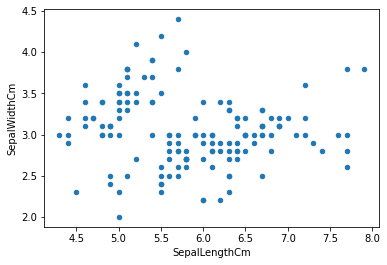

In [18]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

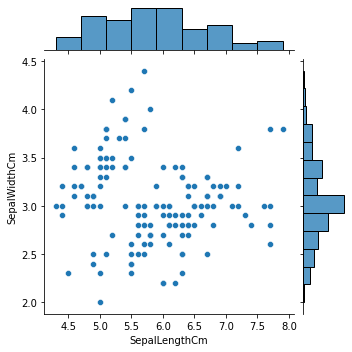

In [19]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)
plt.show()

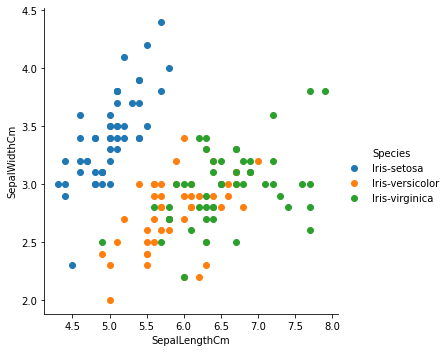

In [20]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

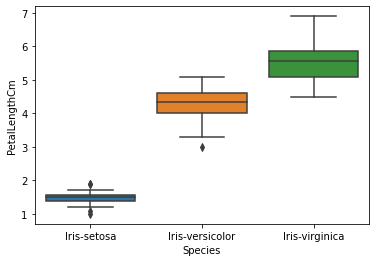

In [21]:
#plot the species data using a box plot:

sns.boxplot(x="Species", y="PetalLengthCm", data=df )
plt.show()

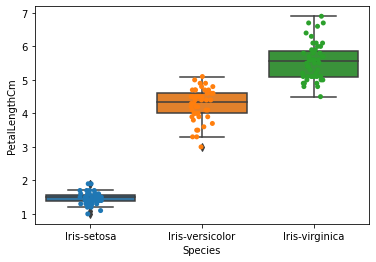

In [32]:
ax= sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")
plt.show()

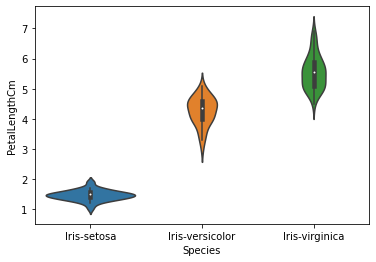

In [34]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)
plt.show()

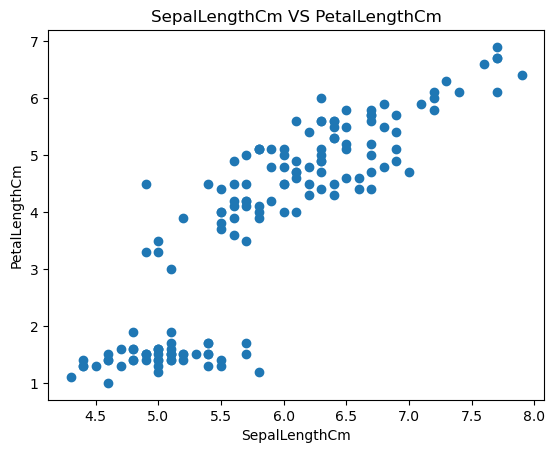

In [10]:
# Scatter Plot 
X = df["SepalLengthCm"]
Y = df["PetalLengthCm"]
plt.scatter(X, Y)
plt.title("SepalLengthCm VS PetalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.show()


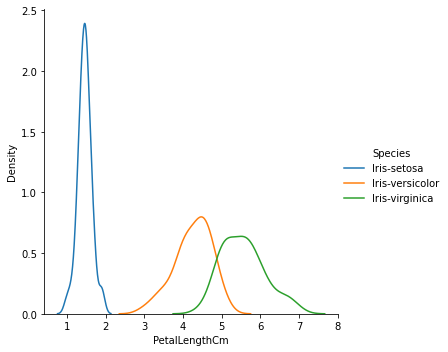

In [36]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.show()

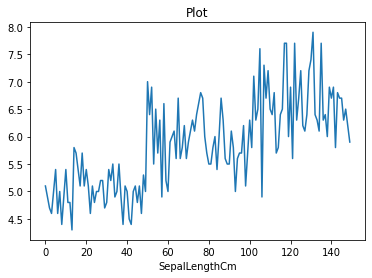

In [37]:
#Matplotlib
X = df["SepalLengthCm"]
plt.plot(X)
plt.title("Plot")
plt.xlabel("SepalLengthCm")
plt.show()

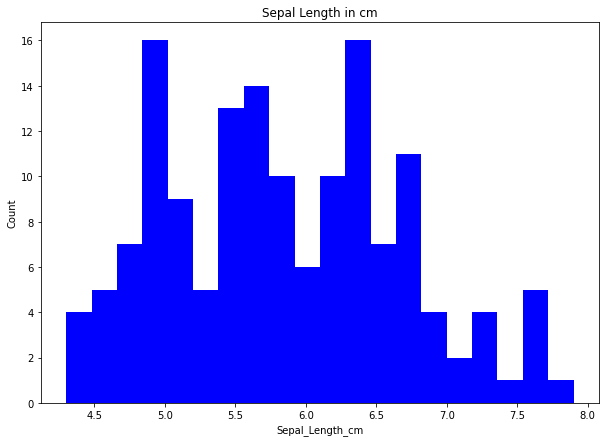

In [38]:
# Histogram for Sepal Length
plt.figure(figsize = (10, 7))
x = df["SepalLengthCm"]
plt.hist(x, bins = 20, color = "blue")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")
plt.show()

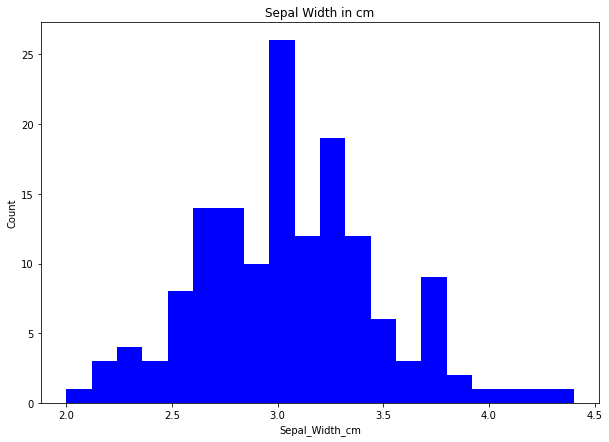

In [39]:
#Histogram for Sepal Width
plt.figure(figsize = (10, 7))
x = df.SepalWidthCm
plt.hist(x, bins = 20, color = "blue")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

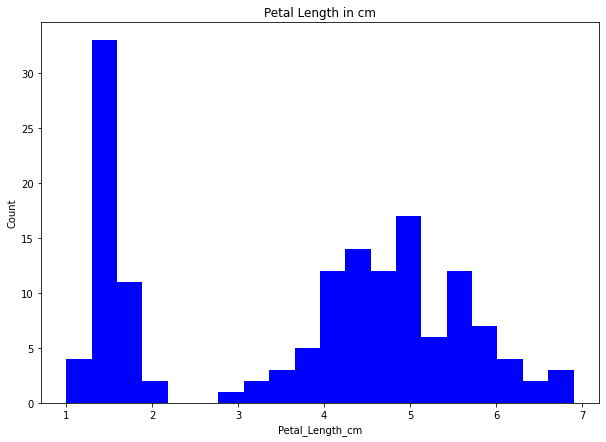

In [40]:
# Histogram for Petal Length
plt.figure(figsize = (10, 7))
x = df.PetalLengthCm
plt.hist(x, bins = 20, color = "blue")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
plt.show()

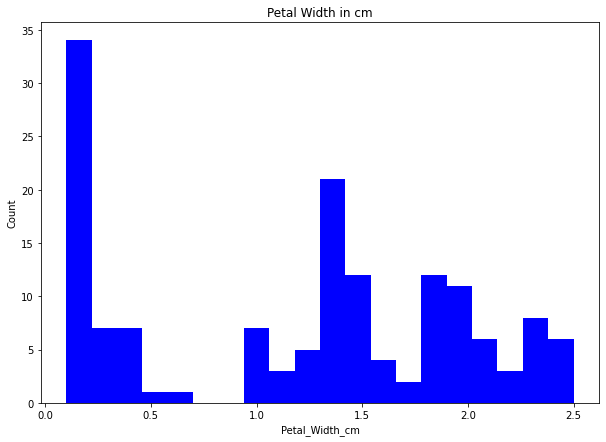

In [41]:
# Histogram for Petal Width
plt.figure(figsize = (10, 7))
x = df.PetalWidthCm
plt.hist(x, bins = 20, color = "blue")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

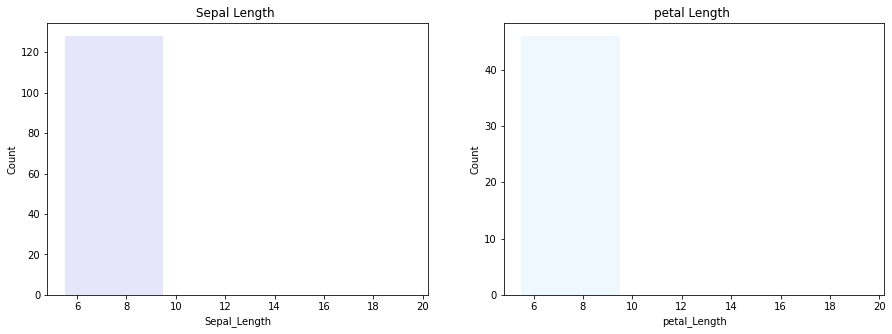

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = df["SepalLengthCm"]
bins=[5,10,15,20]
plt.hist(x1, bins=bins, color='#E6E6FA',histtype='bar', rwidth=0.8)
plt.title("Sepal Length ")
plt.xlabel("Sepal_Length")
plt.ylabel("Count")
plt.subplot(1,2,2)
x2 =  df["PetalLengthCm"]
bins=[5,10,15,20]
plt.hist(x2, bins=bins, color='#F0F8FF', histtype='bar', rwidth=0.8)
plt.title("petal Length ")
plt.xlabel("petal_Length")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

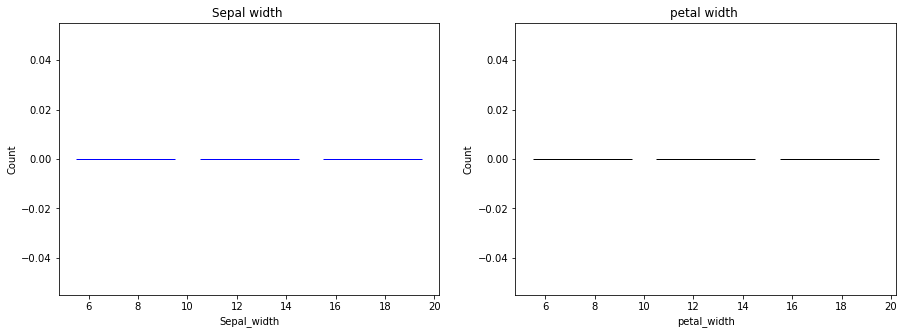

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = df.SepalWidthCm
bins=[5,10,15,20]
plt.hist(x1, bins=bins, color='blue',edgecolor='blue', rwidth=0.8)
plt.title("Sepal width ")
plt.xlabel("Sepal_width")
plt.ylabel("Count")
plt.subplot(1,2,2)
x2 = df.PetalWidthCm
bins=[5,10,15,20]
plt.hist(x2, bins=bins, color='black',edgecolor='black',rwidth=0.8)
plt.title("petal width ")
plt.xlabel("petal_width")
plt.ylabel("Count")

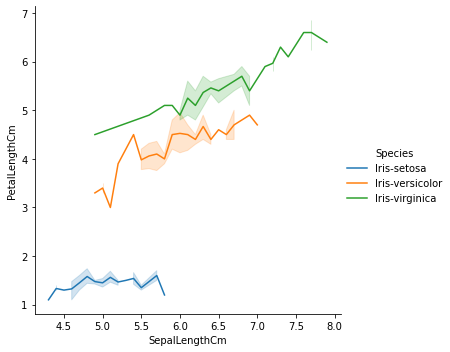

In [63]:
sns.FacetGrid(df,hue='Species',height=5).map(sns.lineplot,'SepalLengthCm','PetalLengthCm').add_legend()

<AxesSubplot:>

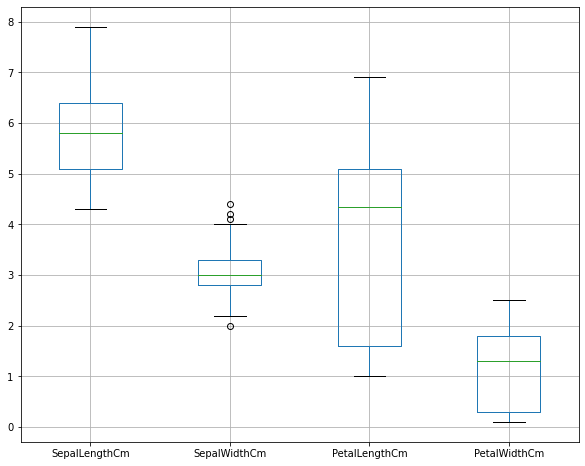

In [67]:
plt.figure(figsize=(10,8))
df.boxplot()

## CSV File

In [27]:
Newdf=df.drop(columns="Species")
DF = Newdf
similarity_matrix = cosine_similarity(Newdf)
similarity_matrix_df = pd.DataFrame(similarity_matrix)
similarity_matrix_df.to_csv('similarity_matrix_IRIS.csv')
print(f"similarity matrix saved to similarity_matrix_Reuters")

similarity matrix saved to similarity_matrix_Reuters


In [8]:
similarity_Data = pd.read_csv('similarity_matrix_IRIS.csv')
similarity_Data.shape

(150, 151)

In [9]:
similarity_Data.head(20)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,0,1.000000,0.998579,0.999987,0.999101,0.999758,0.999003,0.999080,0.999780,0.999135,...,0.878256,0.898527,0.873442,0.875613,0.878619,0.889556,0.880900,0.891786,0.883909,0.886703
1,1,0.998579,1.000000,0.998791,0.998794,0.997241,0.996926,0.996280,0.998914,0.999261,...,0.890779,0.910913,0.886141,0.888069,0.890219,0.902233,0.895512,0.904150,0.893800,0.897874
2,2,0.999987,0.998791,1.000000,0.999217,0.999668,0.999039,0.999036,0.999828,0.999283,...,0.880203,0.900400,0.875362,0.877528,0.880518,0.891478,0.882910,0.893629,0.885669,0.888459
3,3,0.999101,0.998794,0.999217,1.000000,0.998717,0.999135,0.998696,0.999769,0.999939,...,0.895960,0.914286,0.892022,0.893886,0.896240,0.906172,0.898580,0.908769,0.901235,0.904442
4,4,0.999758,0.997241,0.999668,0.998717,1.000000,0.999300,0.999603,0.999465,0.998530,...,0.875597,0.895504,0.870877,0.873099,0.876379,0.886585,0.877238,0.889024,0.882401,0.884658
5,5,0.999003,0.996926,0.999039,0.999135,0.999300,1.000000,0.999869,0.999263,0.998869,...,0.891317,0.909722,0.886582,0.888815,0.892324,0.901445,0.891902,0.903509,0.898201,0.899592
6,6,0.999080,0.996280,0.999036,0.998696,0.999603,0.999869,1.000000,0.999090,0.998352,...,0.884458,0.903236,0.879704,0.881982,0.885611,0.894749,0.884848,0.896983,0.891897,0.893230
7,7,0.999780,0.998914,0.999828,0.999769,0.999465,0.999263,0.999090,1.000000,0.999756,...,0.887011,0.906331,0.882657,0.884667,0.887325,0.897779,0.889682,0.900220,0.892474,0.895517
8,8,0.999135,0.999261,0.999283,0.999939,0.998530,0.998869,0.998352,0.999756,1.000000,...,0.895918,0.914588,0.891798,0.893684,0.896018,0.906376,0.898960,0.908775,0.900668,0.904006
9,9,0.998765,0.999652,0.998908,0.999386,0.997753,0.997372,0.996868,0.999318,0.999617,...,0.890901,0.910270,0.887058,0.888787,0.890522,0.901835,0.895416,0.904532,0.894706,0.899227


In [26]:
Dissimilarity_matrix = 1 - cosine_similarity(Newdf)
np.fill_diagonal(Dissimilarity_matrix, 0)
Dissimilarity_matrix_df = pd.DataFrame(Dissimilarity_matrix)
Dissimilarity_matrix_df.to_csv('Dissimilarity_matrix_IRIS.csv')
print(f"Dissimilarity matrix saved to Dissimilarity_matrix_Reuters")

Dissimilarity matrix saved to Dissimilarity_matrix_Reuters


In [24]:
Dissimilarity_Data = pd.read_csv('Dissimilarity_matrix_IRIS.csv')
Dissimilarity_Data.shape

(150, 151)

In [25]:
Dissimilarity_Data.head(20)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,0,0.000000,0.001421,0.000013,0.000899,0.000242,0.000997,0.000920,0.000220,0.000865,...,0.121744,0.101473,0.126558,0.124387,0.121381,0.110444,0.119100,0.108214,0.116091,0.113297
1,1,0.001421,0.000000,0.001209,0.001206,0.002759,0.003074,0.003720,0.001086,0.000739,...,0.109221,0.089087,0.113859,0.111931,0.109781,0.097767,0.104488,0.095850,0.106200,0.102126
2,2,0.000013,0.001209,0.000000,0.000783,0.000332,0.000961,0.000964,0.000172,0.000717,...,0.119797,0.099600,0.124638,0.122472,0.119482,0.108522,0.117090,0.106371,0.114331,0.111541
3,3,0.000899,0.001206,0.000783,0.000000,0.001283,0.000865,0.001304,0.000231,0.000061,...,0.104040,0.085714,0.107978,0.106114,0.103760,0.093828,0.101420,0.091231,0.098765,0.095558
4,4,0.000242,0.002759,0.000332,0.001283,0.000000,0.000700,0.000397,0.000535,0.001470,...,0.124403,0.104496,0.129123,0.126901,0.123621,0.113415,0.122762,0.110976,0.117599,0.115342
5,5,0.000997,0.003074,0.000961,0.000865,0.000700,0.000000,0.000131,0.000737,0.001131,...,0.108683,0.090278,0.113418,0.111185,0.107676,0.098555,0.108098,0.096491,0.101799,0.100408
6,6,0.000920,0.003720,0.000964,0.001304,0.000397,0.000131,0.000000,0.000910,0.001648,...,0.115542,0.096764,0.120296,0.118018,0.114389,0.105251,0.115152,0.103017,0.108103,0.106770
7,7,0.000220,0.001086,0.000172,0.000231,0.000535,0.000737,0.000910,0.000000,0.000244,...,0.112989,0.093669,0.117343,0.115333,0.112675,0.102221,0.110318,0.099780,0.107526,0.104483
8,8,0.000865,0.000739,0.000717,0.000061,0.001470,0.001131,0.001648,0.000244,0.000000,...,0.104082,0.085412,0.108202,0.106316,0.103982,0.093624,0.101040,0.091225,0.099332,0.095994
9,9,0.001235,0.000348,0.001092,0.000614,0.002247,0.002628,0.003132,0.000682,0.000383,...,0.109099,0.089730,0.112942,0.111213,0.109478,0.098165,0.104584,0.095468,0.105294,0.100773
